## Data Description:

The data contains features extracted from the silhouette of vehicles in
different angles. Four "Corgie" model vehicles were used for the experiment: a
double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars.
This particular combination of vehicles was chosen with the expectation that
the bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars.

## Domain:

Object recognition

## Context:

The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be
viewed from one of many different angles.

## Attribute Information:

● All the features are geometric features extracted from the silhouette.
● All are numeric in nature.

## Learning Outcomes:

● Exploratory Data Analysis
● Reduce number dimensions in the dataset with minimal information loss
● Train a model using Principal Components

## Objective:

Apply dimensionality reduction technique – PCA and train a model using
principal components instead of training the model using just the raw data.

## Importing all necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## Reading the vehicle.csv file into a Pandas.Dataframe 'df'

In [2]:
df = pd.read_csv("vehicle.csv")

## Perform Basic EDA on dataset

### a. Shape of data:

In [3]:
print('The total number of rows :', df.shape[0])
print('The total number of columns :', df.shape[1])

The total number of rows : 846
The total number of columns : 19


### b. Datatypes of the attributes: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### Observations

##### int64 Attributes 

1. compactness
2. max.length_aspect_ratio
3. max.length_rectangularity
4. hollows_ratio

##### float Attributes

1. circularity                    
2. distance_circularity           
3. radius_ratio                   
4. pr.axis_aspect_ratio           
5. scatter_ratio                  
6. elongatedness                  
7. pr.axis_rectangularity         
8. scaled_variance                
9. scaled_variance.1              
10. scaled_radius_of_gyration      
11. scaled_radius_of_gyration.1    
12. skewness_about                 
13. skewness_about.1               
14. skewness_about.2               


### c. Checking the presence of missing values

In [5]:
df.isna().sum().sort_values()

compactness                    0
hollows_ratio                  0
max.length_aspect_ratio        0
max.length_rectangularity      0
class                          0
scatter_ratio                  1
elongatedness                  1
skewness_about.1               1
skewness_about.2               1
pr.axis_aspect_ratio           2
scaled_variance.1              2
scaled_radius_of_gyration      2
pr.axis_rectangularity         3
scaled_variance                3
distance_circularity           4
scaled_radius_of_gyration.1    4
circularity                    5
skewness_about                 6
radius_ratio                   6
dtype: int64

### d. Information about the attributes in dataset

In [6]:
#Checking the head of the dataset for an overview of the data
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Details about all the features in the data

$
\begin{equation*}
compactness = \frac{(avg \hspace{2mm} perimeter)^2}{area} \\
circularity = \frac{(avg \hspace{2mm} radius)^2}{area} \\
distance\_circularity = \frac{area}{(avg \hspace{2mm} distance \hspace{2mm} from \hspace{2mm} border)^2} \\
radius\_ratio = \frac{(max\_radius \hspace{2mm} - \hspace{2mm} min\_radius)}{avg \hspace{2mm} radius} \\
pr.axis\_aspect\_ratio = \frac{(minor \hspace{2mm} axis)}{(major \hspace{2mm} axis)} \\
max.length\_aspect\_ratio = \frac{(length \hspace{2mm} perp. \hspace{2mm} max \hspace{2mm} length)}{(max \hspace{2mm} length)} \\
scatter\_ratio = \frac{(inertia \hspace{2mm} about \hspace{2mm} minor \hspace{2mm} axis)}{(inertia \hspace{2mm} about \hspace{2mm} major \hspace{2mm} axis)} \\
elongatedness = \frac{area}{(shrink \hspace{2mm} width)^2} \\
pr.axis\_rectangularity = \frac{area}{(pr.axis \hspace{2mm} length \hspace{2mm} \ast \hspace{2mm} pr.axis \hspace{2mm} width)} \\
max.length\_rectangularity = \frac{area}{(max.length \hspace{2mm} \ast \hspace{2mm} length \hspace{2mm} perp. \hspace{2mm} to \hspace{2mm} this)} \\
scaled\_variance (scaled \hspace{1mm} variance \hspace{1mm} along \hspace{1mm} major \hspace{1mm} axis) = \frac{(2nd \hspace{2mm} order \hspace{2mm} moment \hspace{2mm} about \hspace{2mm} minor \hspace{2mm} axis)}{area} \\
scaled\_variance.1 (scaled \hspace{1mm} variance \hspace{1mm} along \hspace{1mm} minor \hspace{1mm} axis) = \frac{(2nd \hspace{2mm} order \hspace{2mm} moment \hspace{2mm} about \hspace{2mm} major \hspace{2mm} axis)}{area} \\
scaled\_radius\_of\_gyration = \frac{(mavar \hspace{2mm} + \hspace{2mm} mivar)}{area} \\
skewness\_about = \frac{(3rd \hspace{2mm} order \hspace{2mm} moment \hspace{2mm} about \hspace{2mm} major \hspace{2mm} axis)}{\sigma_{min}^3} \\
skewness\_about.1 = \frac{(3rd \hspace{2mm} order \hspace{2mm} moment \hspace{2mm} about \hspace{2mm} minor \hspace{2mm} axis)}{\sigma_{maj}^3} \\
hollows\_ratio = \frac{(area \hspace{2mm} of \hspace{2mm} hollows)}{(area \hspace{2mm} of \hspace{2mm} bounding \hspace{2mm} polygon)} \\
\end{equation*}
$

Where 

$\sigma_{maj}^2$ is the variance along the major axis, and 

$\sigma_{min}^2$ is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.

**class** = Categorical Attribute with 3 values - Van, Bus, Car

**The information on attributes is obtained from the below reference url**

[Statlog (Vehicle Silhouettes) Data Set](https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes))


### e. 5 point summary of the data

In [7]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### Observations

Let us consider the following,

**Max_Whisker** = $Q3 + (1.5 \ast (IQR))$
<br>
**Min_Whisker** = $Q1 - (1.5 \ast (IQR))$

1. **compactness** - Looks evenly distributed as mean(93.6) and median(93) are very close and also no outliers as max and min value are within **Max_Whisker** and **Min_Whisker** respectively
<br><br>
2. **circularity** - Looks evenly distributed as mean(44.8) and median(44) are very close and also no outliers as max and min value are within **Max_Whisker** and **Min_Whisker** respectively
<br><br>
3. **distance_circularity** - Looks evenly distributed as mean(82) and median(80) are very close and also no outliers as max and min value are within **Max_Whisker** and **Min_Whisker** respectively. Despite having no outliers, the reason for mean being slightly higher would be because there are more records above the median value. 
<br><br>
4. **radius_ratio** - Looks evenly distributed as mean(168.8) and median(167) are very close. However there are outliers on the higher side as $max\_value (333) > Max\_Whisker$. 
<br><br>
5. **pr.axis_aspect_ratio** - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(61.6) and median(61) are very close. However there are few outliers on the higher side as $max\_value (138) > Max\_Whisker$. Hence right skewed.
<br><br>
6. **max.length_aspect_ratio** - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(8.5) and median(8) are very close. However there are many outliers on the higher side as $max\_value (55) > Max\_Whisker$ and few on the lower side as well as $min\_value (2) > Min\_Whisker$. Hence right skewed.
<br><br>
7. **scatter_ratio** - Looks skewed towards right as mean(168.9) is greater than the median(157) and there are outliers as $max\_value (265) > Max\_Whisker$. 
<br><br>
8. **elongatedness** - Looks evenly distributed with mean(41) and median(43) are close and there are no outliers as max and min value are within **Max_Whisker** and **Min_Whisker** respectively
<br><br>
9. **pr.axis_rectangularity** - Looks evenly distributed with mean(20.5) and median(20) are close and there are no outliers as max and min value are within **Max_Whisker** and **Min_Whisker** respectively
<br><br>
10. **max.length_rectangularity** - Looks evenly distributed with mean(147) and median(146) are close and there are no outliers as max and min value are within **Max_Whisker** and **Min_Whisker** respectively
<br><br>
11. **scaled_variance** - Looks skewed towards right as mean(188) is greater than the median(179) and there are outliers as $max\_value (320) > Max\_Whisker$. 
<br><br>
12. **scaled_variance.1** - Looks skewed towards right as mean(439) is greater than the median(363) and there are outliers as $max\_value (1018) > Max\_Whisker$.
<br><br>
13. **scaled_radius_of_gyration** - Looks evenly distributed with mean(174) and median(173.5) are close and there are no outliers as max and min value are within **Max_Whisker** and **Min_Whisker**
<br><br>
14. **scaled_radius_of_gyration.1** - Looks evenly distributed if consider min, Q1,Q2,Q3 as mean(72.4) and median(71.5) are very close. However there are many outliers on the higher side as $max\_value (135) > Max\_Whisker$. Hence right skewed.
<br><br>
15. **skewness_about** - Min value is zero. Looks evenly distributed if consider Q1,Q2,Q3 as mean(6.3) and median(6) are very close. However there are many outliers on the higher side as $max\_value (22) > Max\_Whisker$. Hence right skewed.
<br><br>
16. **skewness_about.1** - Min value is zero. Looks skewed towards right as mean(12.6) is greater than median(11) and there are few outliers on the higher side as $max\_value (41) > Max\_Whisker$. Hence right skewed.
<br><br>
17. **skewness_about.2** - Looks evenly distributed with mean(188.9) and median(188) are close and there are no outliers as max and min value are within **Max_Whisker** and **Min_Whisker**
<br><br>
18. **hollows_ratio** - Looks evenly distributed with mean(195.6) and median(197) are close and there are no outliers as max and min value are within **Max_Whisker** and **Min_Whisker**

## 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

### Replace missing values with Median

In [8]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(missing_values=np.nan, strategy='median')
cols = df.columns[:18]
df.iloc[:,:18] = sim.fit_transform(df.iloc[:,:18])
df.iloc[:,:18] = pd.DataFrame(df.iloc[:,:18], columns=cols)

In [9]:
display(df.isna().sum().sort_values())
print('===================')
print('**CONCLUSION**: **"Missing"** values are replaced with **Median** of the respective attributes')

compactness                    0
skewness_about.2               0
skewness_about.1               0
skewness_about                 0
scaled_radius_of_gyration.1    0
scaled_radius_of_gyration      0
scaled_variance.1              0
scaled_variance                0
hollows_ratio                  0
max.length_rectangularity      0
elongatedness                  0
scatter_ratio                  0
max.length_aspect_ratio        0
pr.axis_aspect_ratio           0
radius_ratio                   0
distance_circularity           0
circularity                    0
pr.axis_rectangularity         0
class                          0
dtype: int64

**CONCLUSION**: **"Missing"** values are replaced with **Median** of the respective attributes


## Label encoding Target attribute

In [10]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

def lencode(col, data):
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col]) # returns label encoded variable(s)
    return data

In [11]:
df = lencode('class', df)

In [12]:
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

### Univariate Analysis of Continuous Atttributes and Distrbutions

In [13]:
def distplot(figRows,figCols,xSize, ySize, features, colors):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(df[features[row][col]], color=colors[row][col], ax=axesplt, kde=True, hist_kws={"edgecolor":"k"})
            plot.set_xlabel(features[row][col],fontsize=20)

In [14]:
pal = sns.color_palette(palette='Set1', n_colors=16)

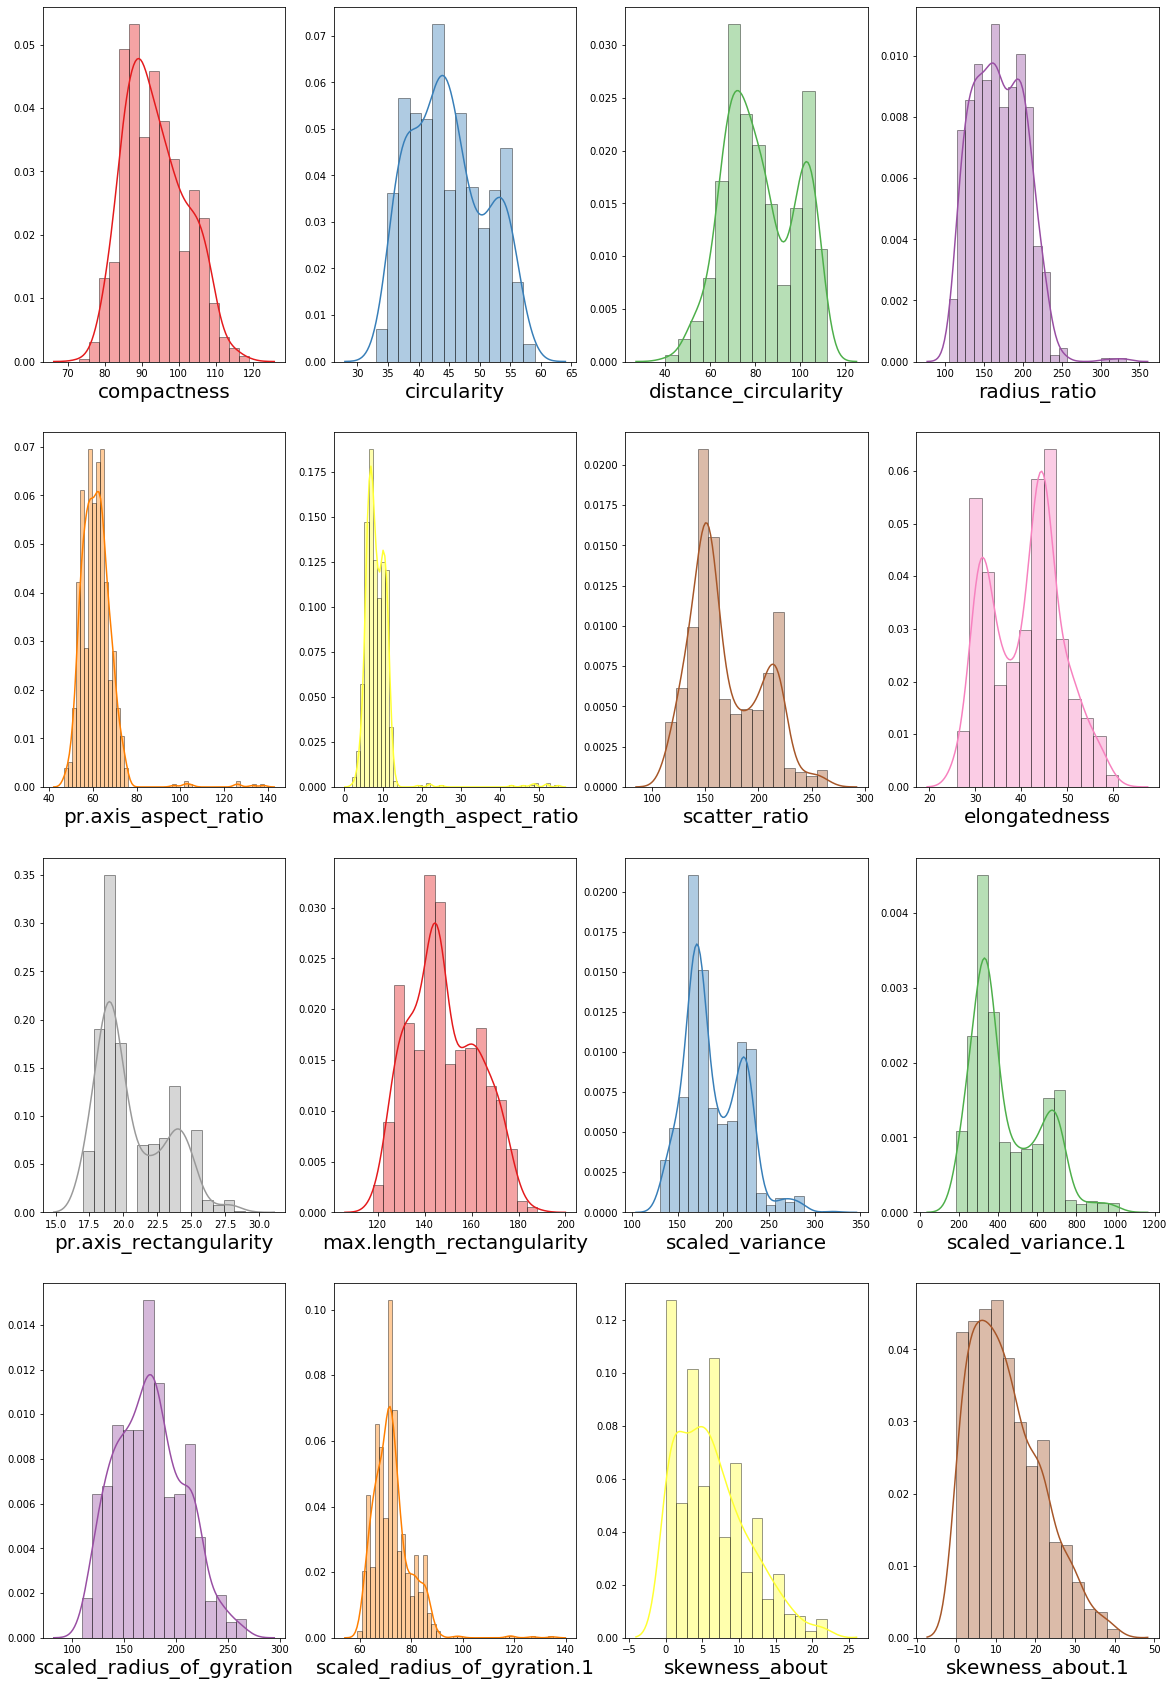

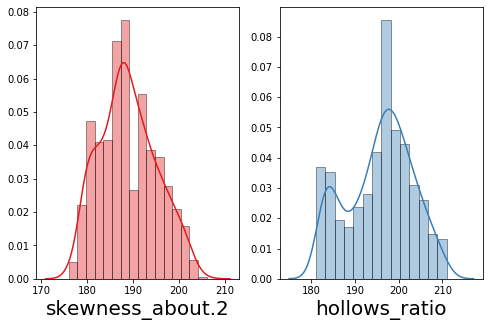

In [15]:
distplot(4, 4, 20, 30, df.columns[:16].tolist(), pal.as_hex())
distplot(1, 2, 8, 5, df.columns[16:18].tolist(), pal.as_hex()[:2])

### Observations
1. **compactness** - Looks normally distributed.
<br><br>
2. **circularity** - Looks uniformly distributed.
<br><br>
3. **distance_circularity** - Looks evenly distributed but there are more values distributed on the higher side. 
<br><br>
4. **radius_ratio** - Looks skewed towards right as we can see few values above 300. Must be outliers. 
<br><br>
5. **pr.axis_aspect_ratio** - Looks skewed towards right as we can see few values above 100. Must be outliers. 
<br><br>
6. **max.length_aspect_ratio** - Looks skewed towards right as we can see few values above 20. Must be outliers. 
<br><br>
7. **scatter_ratio** - Looks evenly distributed.
<br><br>
8. **elongatedness** - Looks evenly distributed.
<br><br>
9. **pr.axis_rectangularity** - Looks evenly distributed with few values missing between 20 and 25.
<br><br>
10. **max.length_rectangularity** - Looks normally distributed.
<br><br>
11. **scaled_variance** - Looks skewed towards right as we can see few values above 300. Must be outliers.
<br><br>
12. **scaled_variance.1** - Looks skewed towards right as we can see few values above 1000. Must be outliers.
<br><br>
13. **scaled_radius_of_gyration** - Looks normally distributed.
<br><br>
14. **scaled_radius_of_gyration.1** - Looks skewed towards right as we can see few values above 100. Must be outliers.
<br><br>
15. **skewness_about** - Looks skewed towards right as we can see few values above 20. Must be outliers.
<br><br>
16. **skewness_about.1** - Looks skewed towards right as we can see few values above 40. Must be outliers.
<br><br>
17. **skewness_about.2** - Looks normally distributed.
<br><br>
18. **hollows_ratio** - Looks evenly distributed.

### Checking the presence of Outliers

In [16]:
def boxplot_all(xSize, ySize, palette, data):
    f, axes = plt.subplots(1, 1, figsize=(xSize, ySize))
    plot = sns.boxplot(x='variable',y='value', data= pd.melt(data), palette='Set1', ax=axes, orient='v')
    plot.set_xlabel('',fontsize=20)
    plot.set_xticklabels(rotation=60, labels=plot.get_xticklabels(),fontweight='demibold',fontsize='x-large')

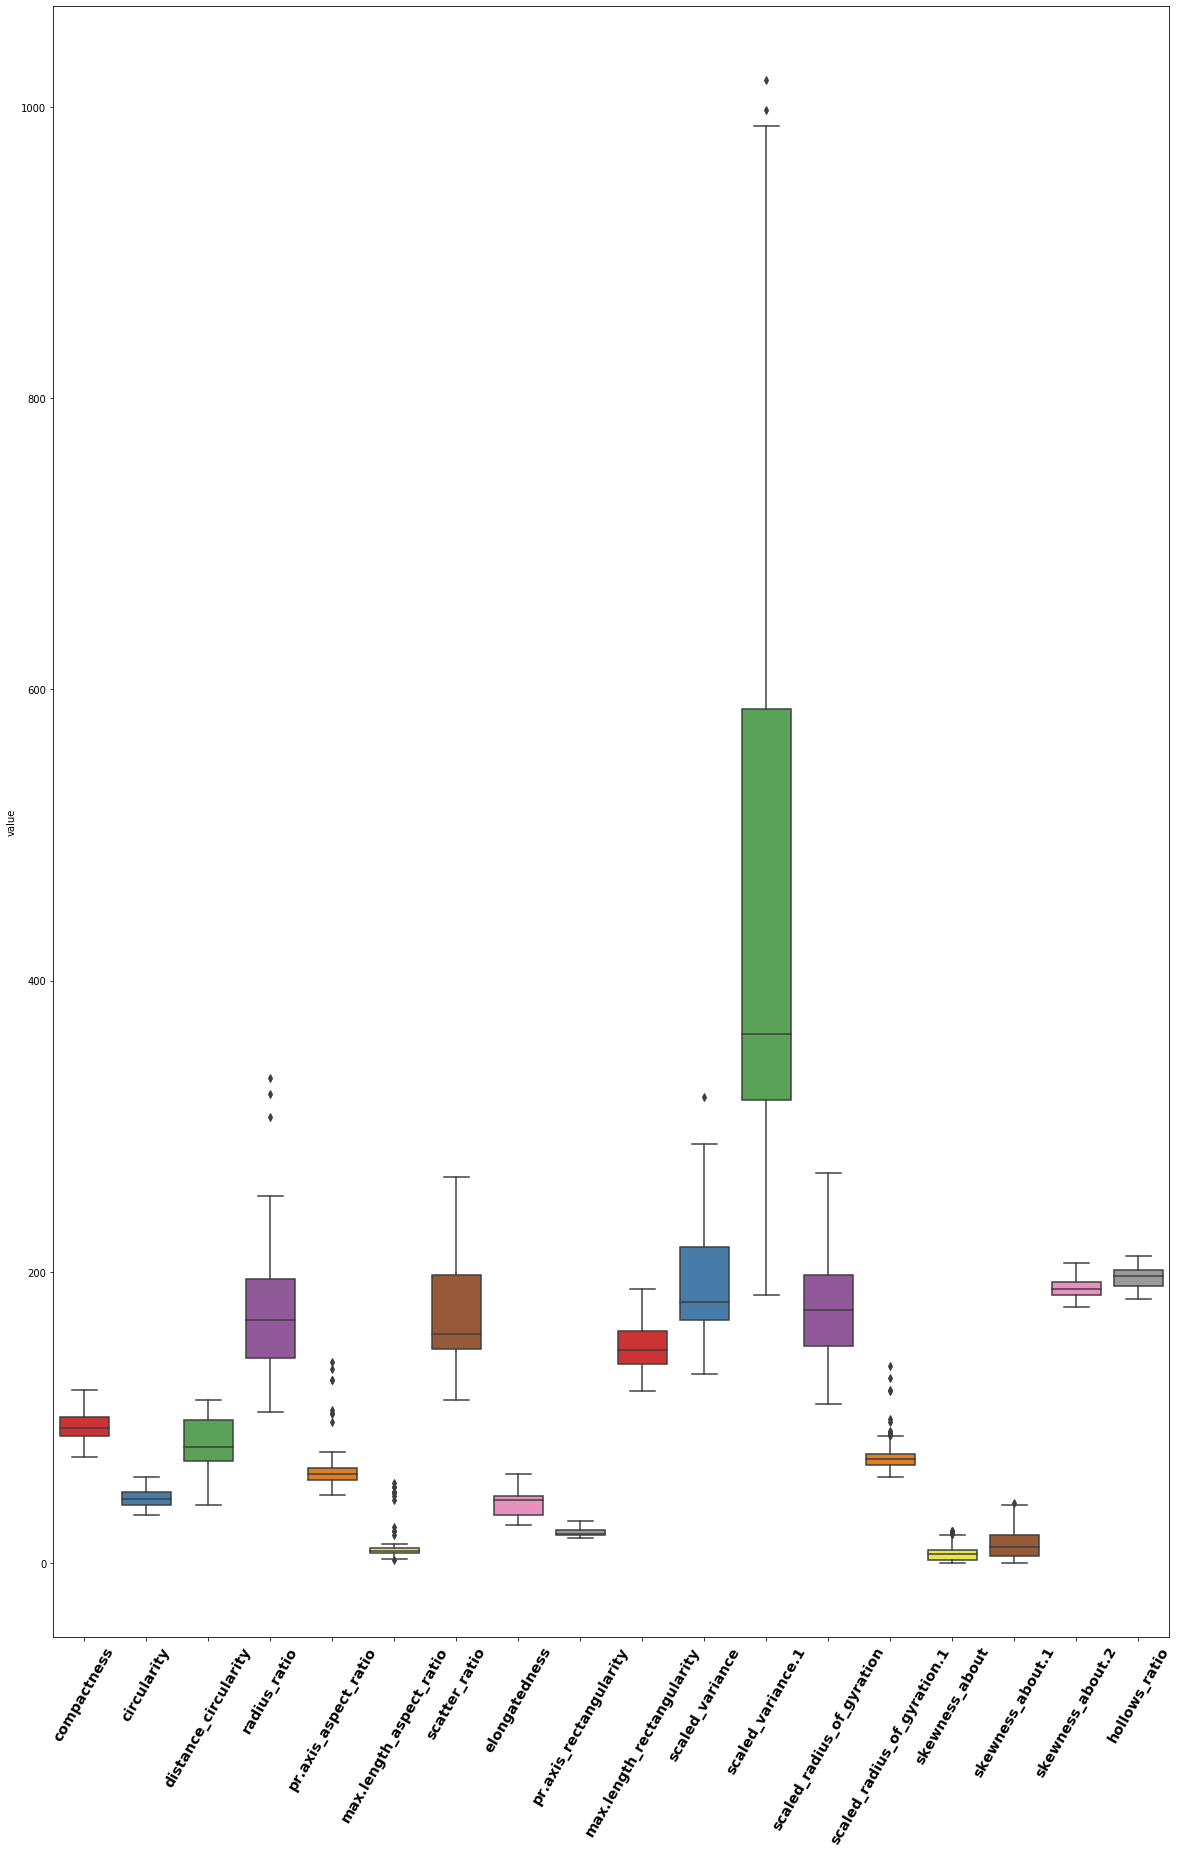

In [17]:
boxplot_all(20,30,palette=['Set1'], data =df.iloc[:,:18])

### Observations

1. Presence of outliers are detected for the below attributes <br>
    **pr.axis_aspect_ratio**,
    **max.length_aspect_ratio**,
    **scaled_radius_of_gyration.1**,
    **radius_ratio**,
    **scaled_variance.1**,
    **scaled_variance**,
    **skewness_about**,
    **skewness_about.1**
2. All other attributes are evenly distributed.   
    

In [18]:
def boxplot(figRows,figCols,xSize, ySize, features, colors, hue=None, orient='h', rotation=30):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.boxplot(features[row][col], data= df, color=colors[row][col], ax=axesplt, orient=orient, hue=hue)
            plot.set_ylabel('',fontsize=20)
            plot.set_xticklabels(rotation=rotation, labels=[features[row][col]], fontweight='demibold',fontsize='large')

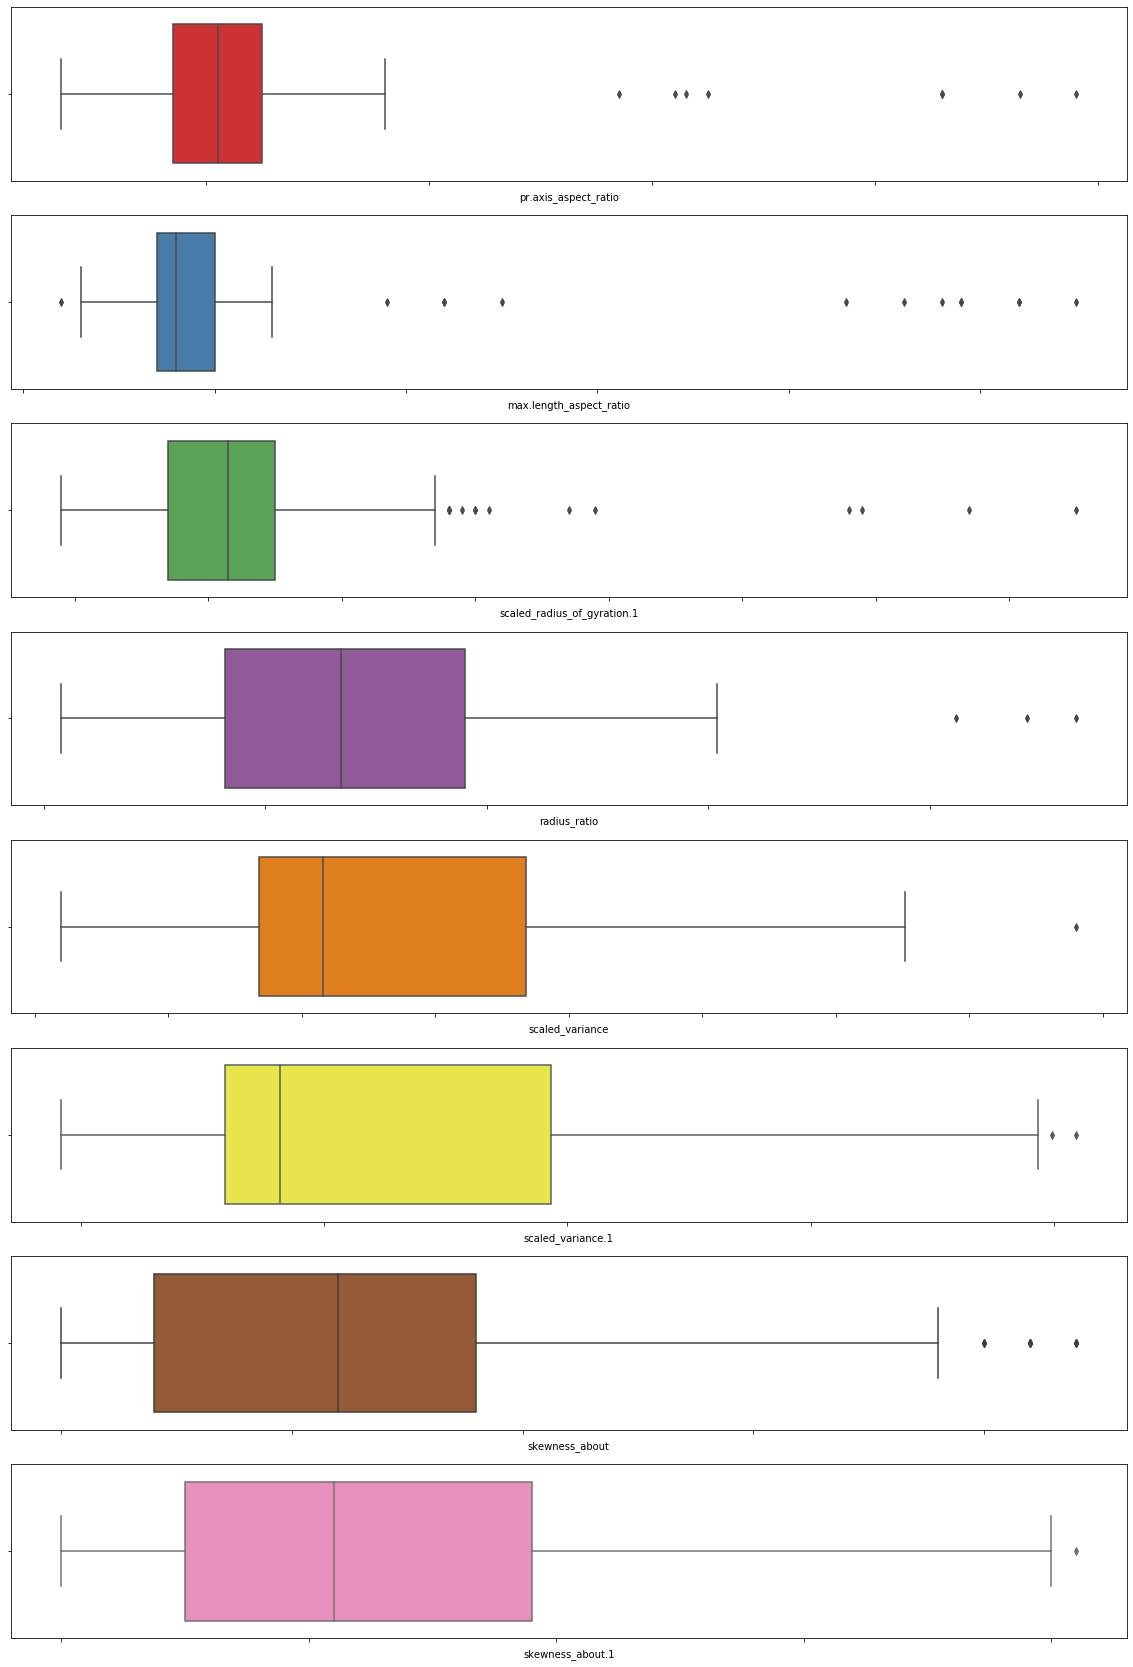

In [19]:
boxplot(8, 1, 20, 30, orient='h', 
        features=['pr.axis_aspect_ratio',
                  'max.length_aspect_ratio',
                  'scaled_radius_of_gyration.1',
                  'radius_ratio',
                  'scaled_variance',
                  'scaled_variance.1',
                 'skewness_about',
                 'skewness_about.1'], 
        colors=pal.as_hex()[:8])

### Observations

1. **pr.axis_aspect_ratio** - Several outliers are seen on the higher side
2. **max.length_aspect_ratio** - Several outliers are seen on the higher side and one on the lower side as well.
3. **scaled_radius_of_gyration.1** - Several outliers are seen on the higher side with some values being very large.
4. **radius_ratio** - Few outliers are seen on the higher side.
5. **scaled_variance** - One outlier is seen on the higher side.
6. **scaled_variance.1** - Two outliers are seen on the higher side.
7. **skewness_about** - Three outliers are seen on the higher side.
8. **skewness_about.1** - One outlier is seen on the higher side.

And hence confirms the skewness for theses attributes

## Multivariate Analysis using Pairplot and Correlation (Pearson's) Heatmap

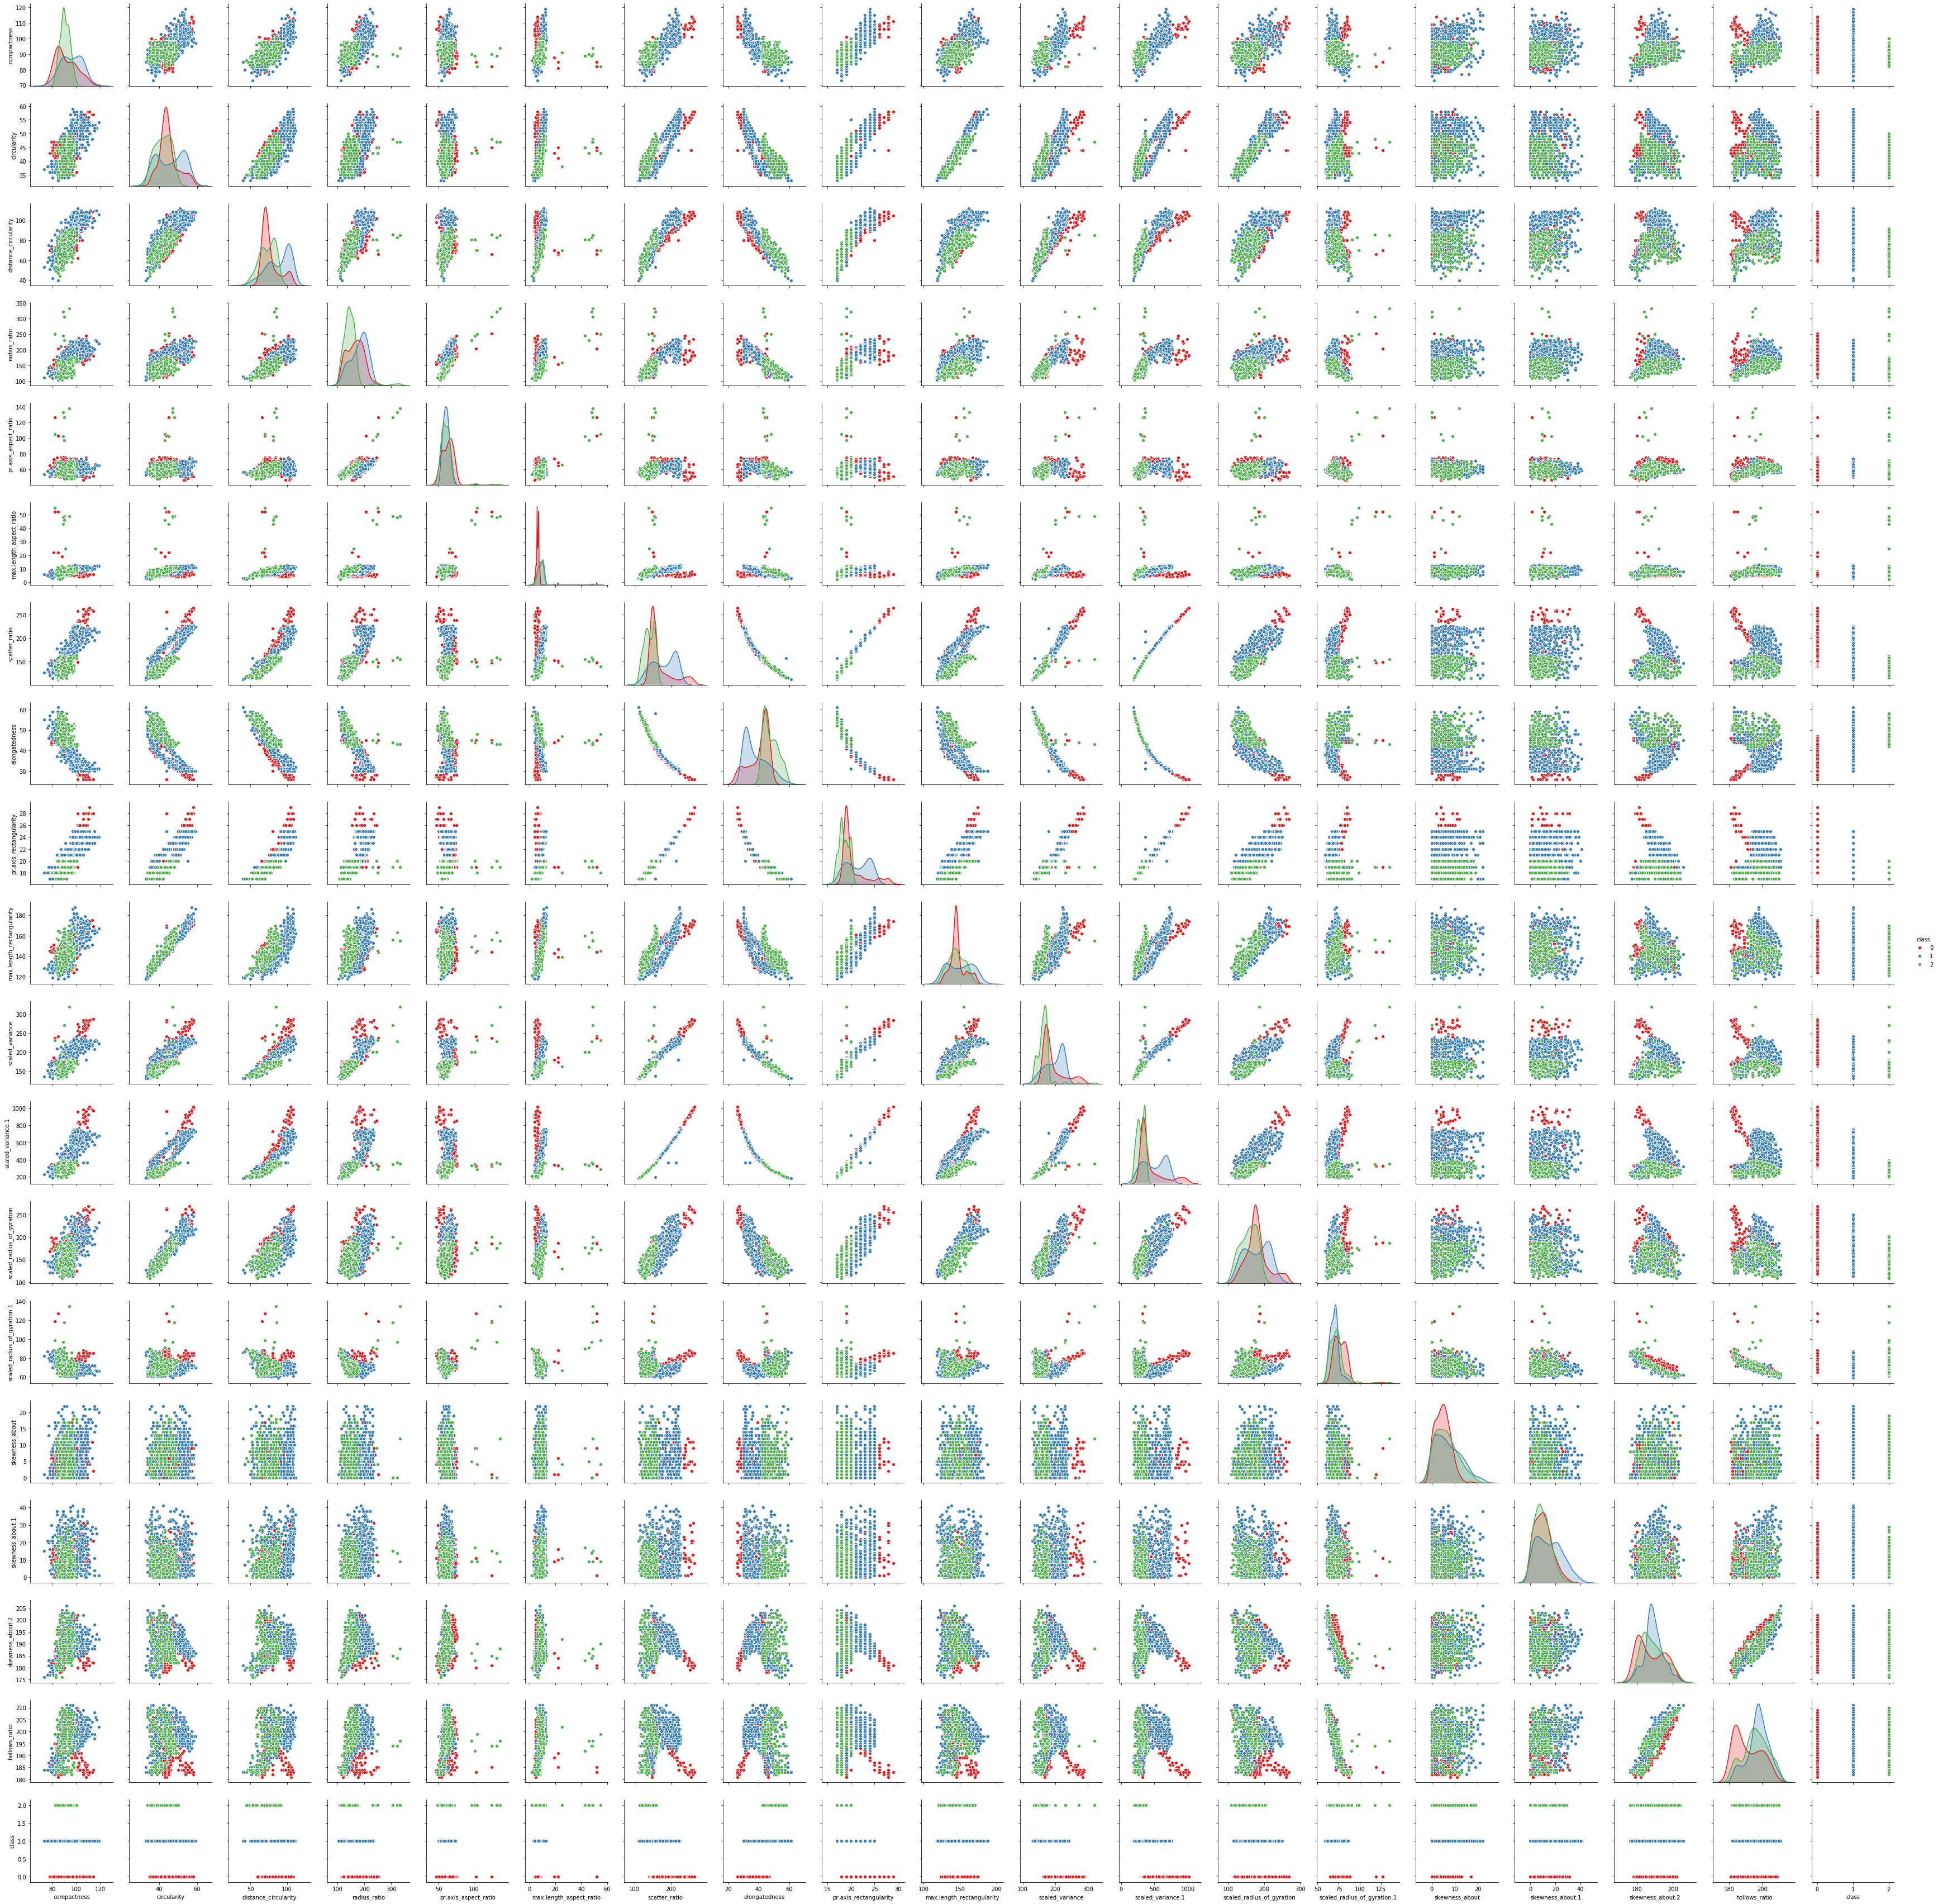

In [20]:
sns.pairplot(data=df, hue='class', palette='Set1', diag_kind='kde')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text xticklabel objects>)

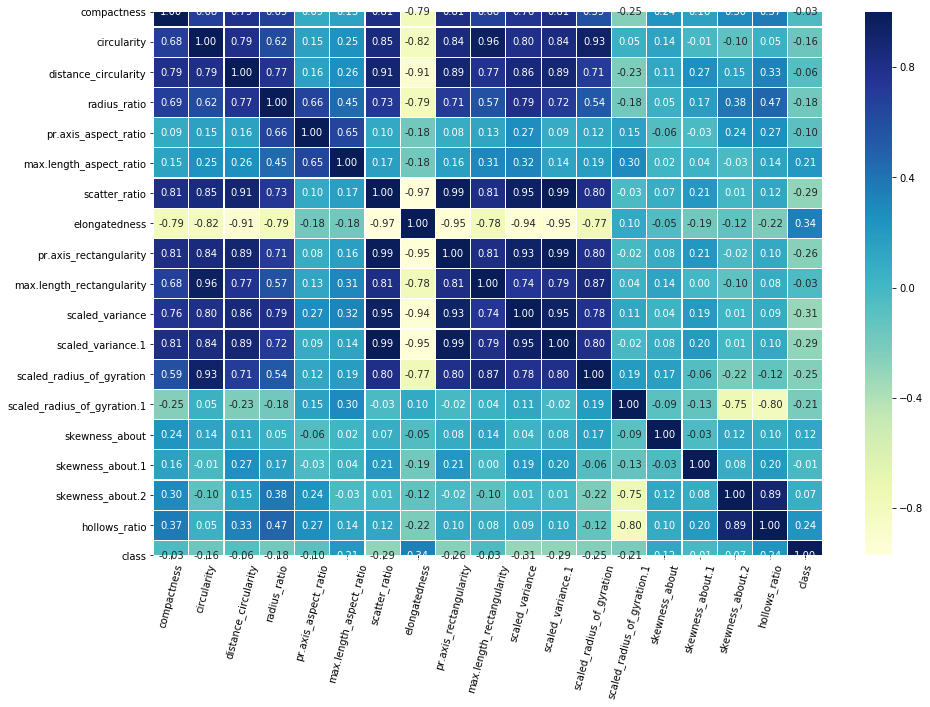

In [21]:
f, axes = plt.subplots(1, 1, figsize=(15, 10))
cor_mat = df.corr()
hplot = sns.heatmap(cor_mat, annot=True, fmt=".2f", ax=axes, linecolor='white', linewidths=0.2, cmap='YlGnBu')
plt.xticks(rotation=75)

### Observations

1. From the pairplot and heatmap, we can observe there are several attributes which are highly correlated with each other.
2. Values coloured with **yellow** are negatively correlated. 
3. Below are the values which are negatively correlated<br>
    a. elongatedness - distance_circularity (**-0.91**)<br>
    b. elongatedness - scatter_ratio (**-0.97**)<br>
    c. elongatedness - pr.axis_rectangularity (**-0.95**)<br>
    d. elongatedness - scaled_variance (**-0.94**)<br>
    e. elongatedness - scaled_variance.1 (**-0.95**)<br>
    <br>
4. There are attributes which have high positive correlation. Those are shown with **dark blue** colour.<br>
    a. circularity - max.length_rectangularity (**0.96**)<br>
    b. circularity - scaled_radius_of_gyration (**0.93**)<br>
    c. distance_circularity - scatter_ratio (**0.91**)<br>
    d. scatter_ratio - pr.axis_rectangularity (**0.99**)<br>
    e. scatter_ratio - scaled_variance (**0.95**)<br>
    f. scatter_ratio - scaled_variance.1 (**0.99**)<br>
    g. pr.axis_rectangularity - scaled_variance (**0.93**)<br>
    h. pr.axis_rectangularity - scaled_variance.1 (**0.99**)<br>
    i. scaled_variance - scaled_variance.1 (**0.95**)<br>

5. We can also observe several outliers throughout the pairplot for **van** (in **red**) and **bus** (in **green**) i.e. the data points scattered away from the core mix

In [22]:
def scatterplot(rowFeature, colFeature, data):
    f, axes = plt.subplots(1, 1, figsize=(10, 8))
        
    plot=sns.scatterplot(x=rowFeature, y=colFeature, data=data, hue='class', style='class', ax=axes)
    plot.set_xlabel(rowFeature,fontsize=20)
    plot.set_ylabel(colFeature,fontsize=20)            

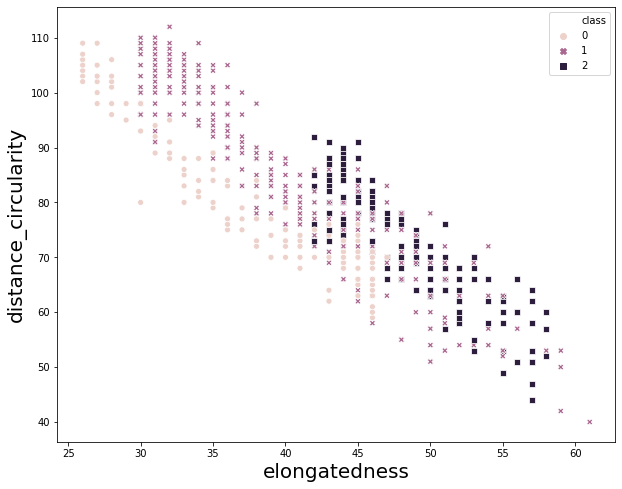

In [23]:
scatterplot('elongatedness', 'distance_circularity', df)

### Observations
**elongatedness** and **distance_circularity** has negative linear correlation.

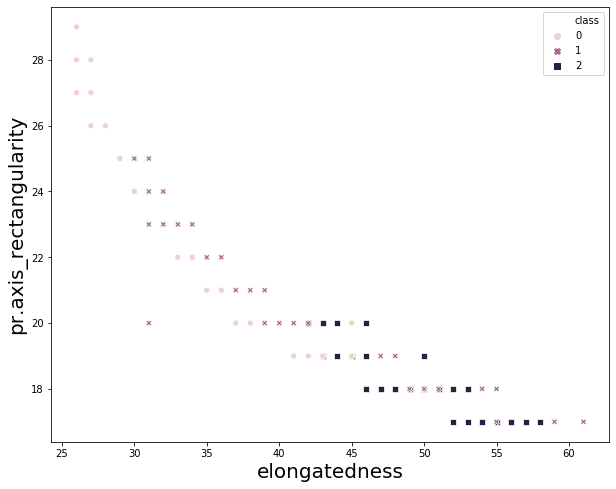

In [24]:
scatterplot('elongatedness', 'pr.axis_rectangularity', df)

### Observations
**elongatedness** and **pr.axis_rectangularity** has negative curvy-linear correlation.

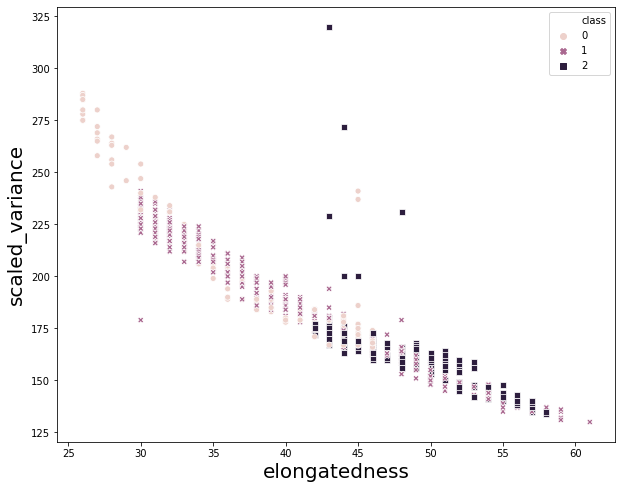

In [25]:
scatterplot('elongatedness', 'scaled_variance', df)

### Observations
**elongatedness** and **scaled_variance** has negative curvy-linear correlation.<br>
We can also observe outliers.

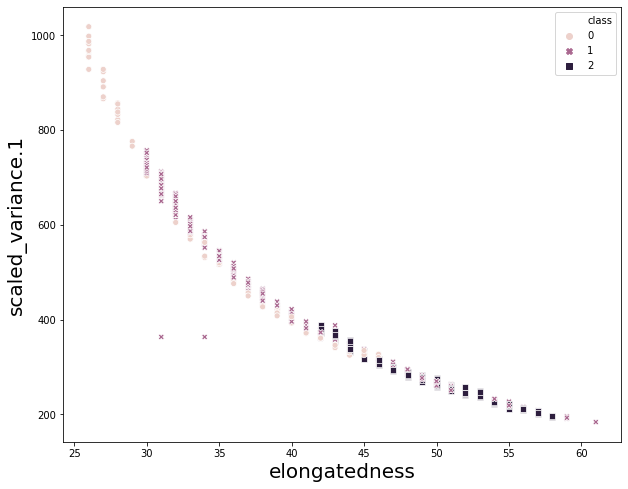

In [26]:
scatterplot('elongatedness', 'scaled_variance.1', df)

### Observations
**elongatedness** and **scaled_variance.1** has negative curvy-linear correlation.<br>
We can also observe outliers for car.

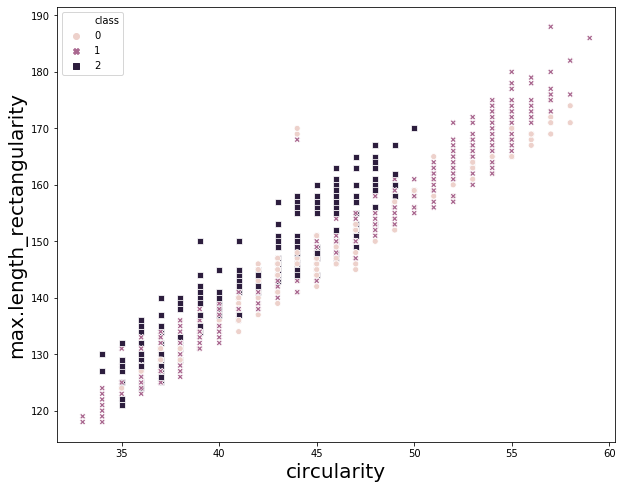

In [27]:
scatterplot('circularity', 'max.length_rectangularity', df)

### Observations
**circularity** and **max.length_rectangularity** has positive linear correlation.<br>

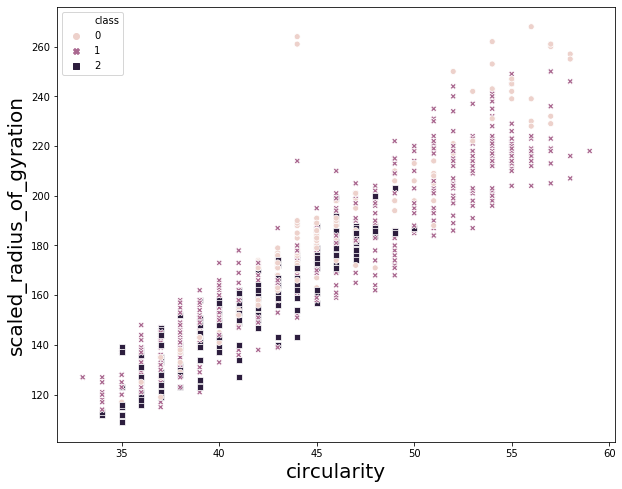

In [28]:
scatterplot('circularity', 'scaled_radius_of_gyration', df)

### Observations
**circularity** and **scaled_radius_of_gyration** has positive linear correlation.<br>

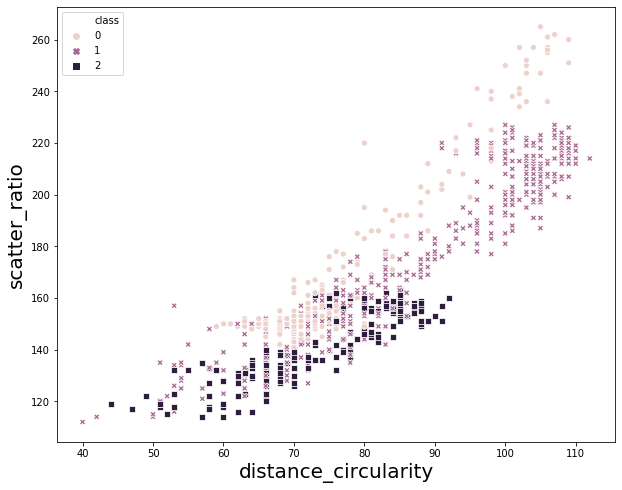

In [29]:
scatterplot('distance_circularity', 'scatter_ratio', df)

### Observations
**distance_circularity** and **scatter_ratio** has positive linear correlation with a slight curve.<br>

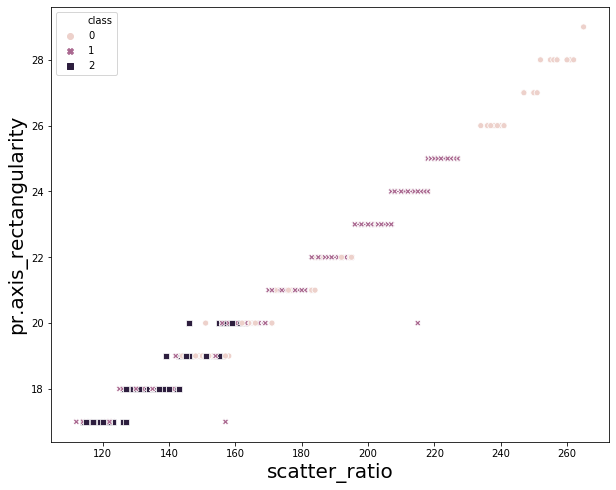

In [30]:
scatterplot('scatter_ratio', 'pr.axis_rectangularity', df)

### Observations
**scatter_ratio** and **pr.axis_rectangularity** has positive linear correlation.<br>

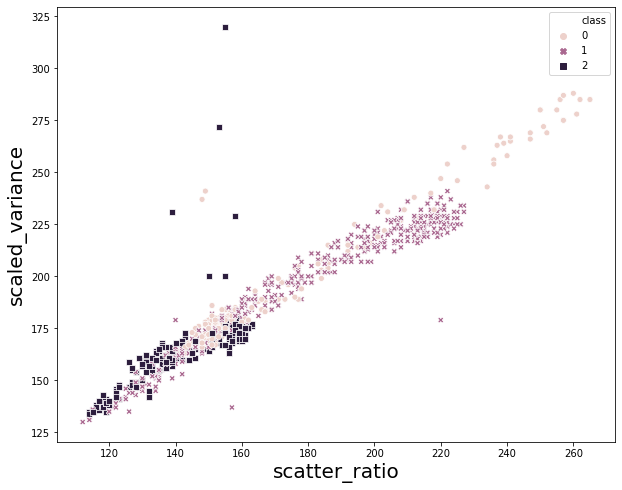

In [31]:
scatterplot('scatter_ratio', 'scaled_variance', df)

### Observations
**scatter_ratio** and **scaled_variance** has positive linear correlation.<br>
We can also observe outliers.

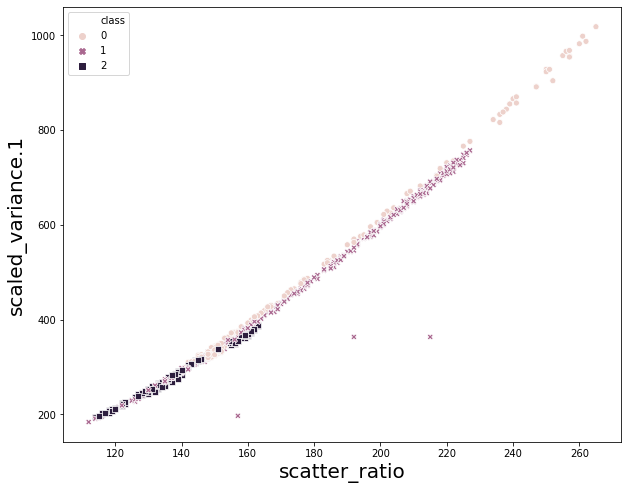

In [32]:
scatterplot('scatter_ratio', 'scaled_variance.1', df)

### Observations
**scatter_ratio** and **scaled_variance.1** has positive linear correlation.<br>
We can also observe outliers.

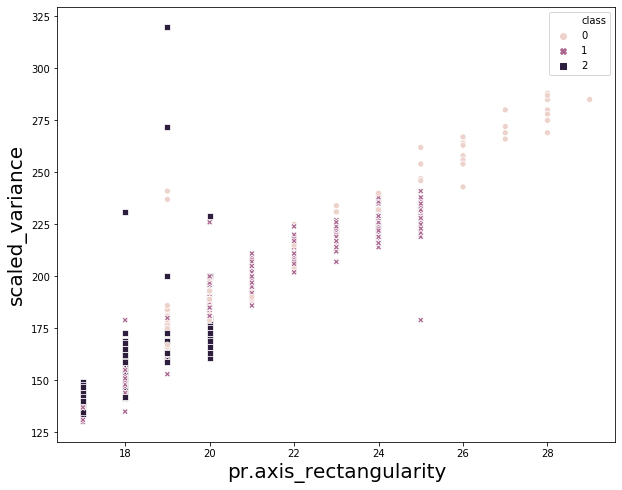

In [33]:
scatterplot('pr.axis_rectangularity', 'scaled_variance', df)

### Observations
**pr.axis_rectangularity** and **scaled_variance** has positive linear correlation.<br>
We can also observe outliers.

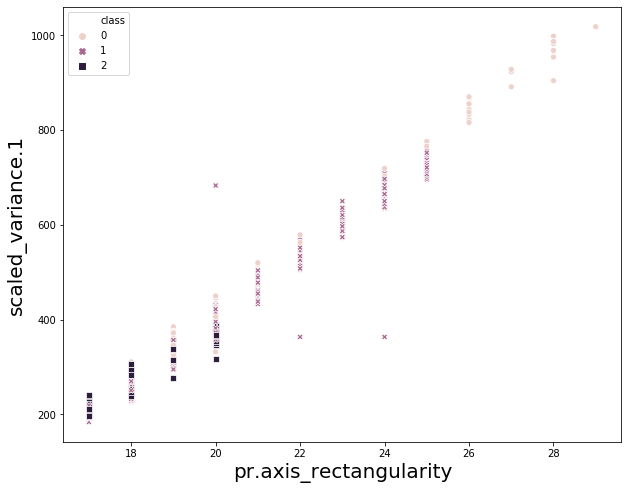

In [34]:
scatterplot('pr.axis_rectangularity', 'scaled_variance.1', df)

### Observations
**pr.axis_rectangularity** and **scaled_variance.1** has positive linear correlation.<br>
We can also observe outliers.

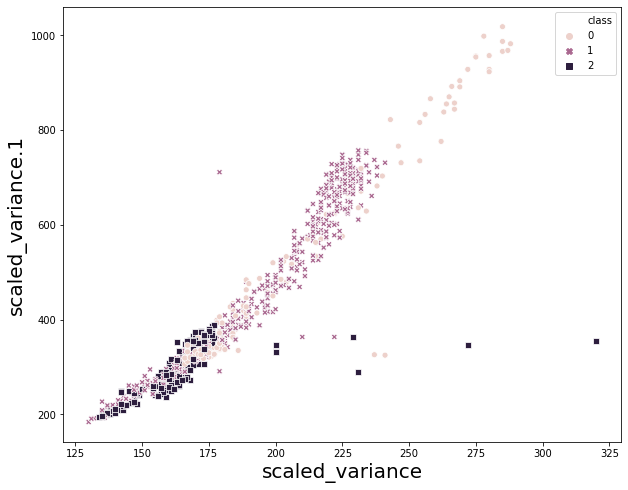

In [35]:
scatterplot('scaled_variance', 'scaled_variance.1', df)

### Observations
**scaled_variance** and **scaled_variance.1** has positive linear correlation.<br>
We can also observe outliers.

## Removing Attributes due to Multicollinearity

In [36]:
def CheckCorrelationUpper(data):
    # Create correlation matrix
    corr_matrix = data.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    f, axes = plt.subplots(1, 1, figsize=(15, 10))
    sns.heatmap(upper,cmap='YlGnBu', annot=True, fmt=".2f", ax=axes, linecolor='white', linewidths=0.2)
    plt.xticks(rotation=75)
    return upper

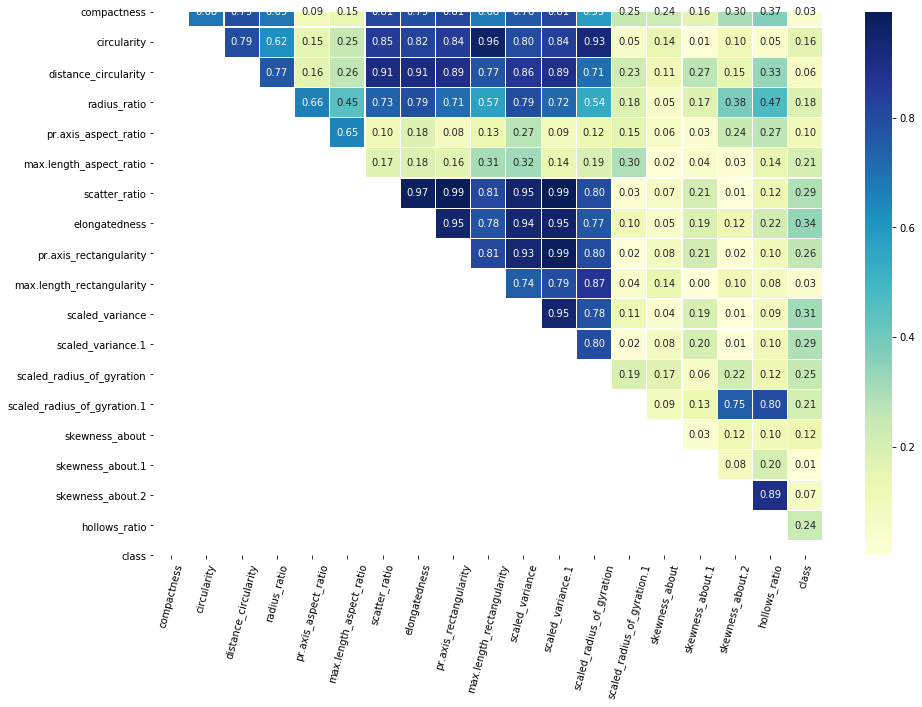

In [37]:
upper = CheckCorrelationUpper(df)

In [38]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print('List of columns with correlation higher than 0.90')
display(to_drop)

List of columns with correlation higher than 0.90


['scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration']

In [39]:
df.drop(['scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance.1', 'circularity'], axis=1, inplace=True)

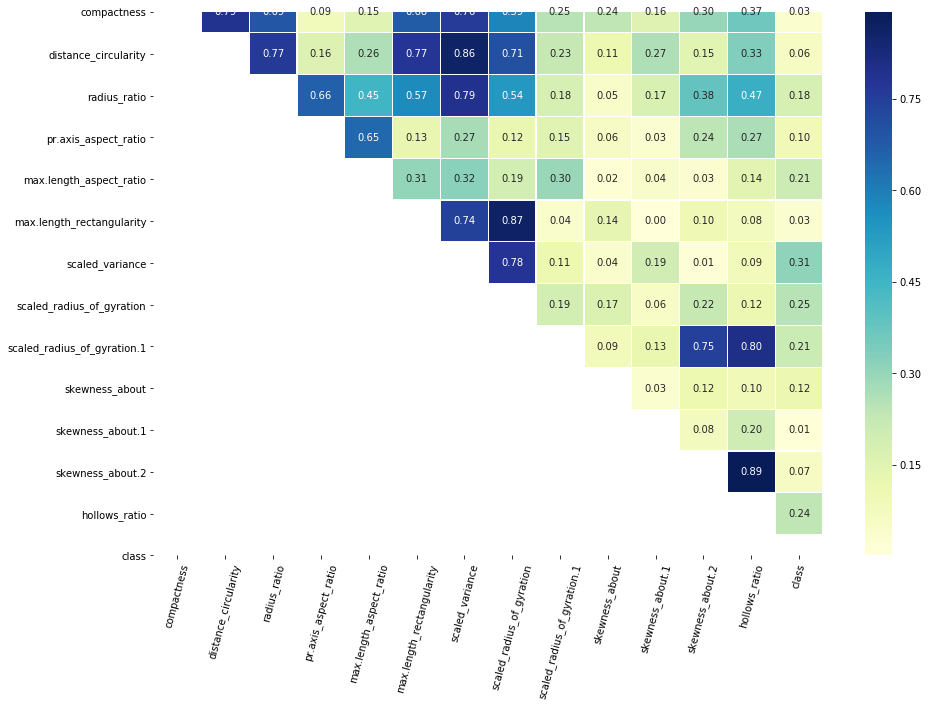

In [40]:
upper = CheckCorrelationUpper(df)

In [41]:
#Removing Outliers
def remove_outliers(col, data):
    outlier_col = col + "_outliers"
    data[outlier_col] = data[col]
    data[outlier_col]= zscore(data[outlier_col])

    condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
    print(data[condition].shape)
    indices = data[condition].index
    data.drop(data[condition].index, axis = 0, inplace = True)
    data.drop(outlier_col, axis=1, inplace=True)
    return indices

In [42]:
max_length_aspect_ratio_index = remove_outliers('max.length_aspect_ratio', df)
remove_outliers('pr.axis_aspect_ratio', df)
remove_outliers('scaled_radius_of_gyration.1', df)

(9, 15)
(0, 15)
(0, 15)


Int64Index([], dtype='int64')

In [43]:
df.shape

(837, 14)

In [44]:
df.shape

(837, 14)

### Observation 
- A total of 9 records are removed from the dataset which is very insignificant compared to total count of 846

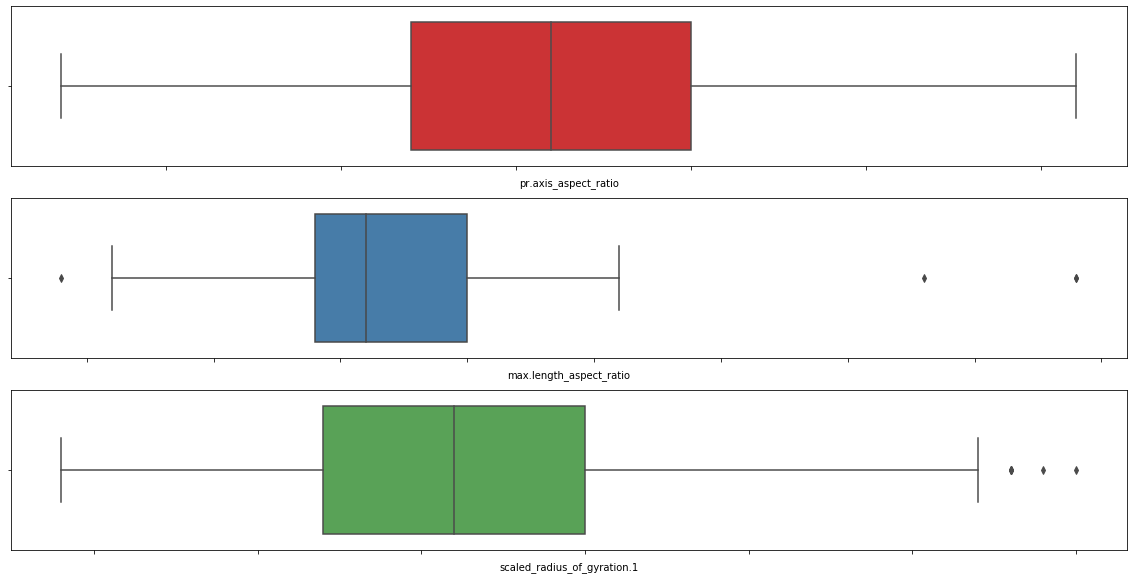

In [45]:
boxplot(3, 1, 20, 10, orient='h', 
        features=['pr.axis_aspect_ratio',
                  'max.length_aspect_ratio',                  
                  'scaled_radius_of_gyration.1'], 
        colors=pal.as_hex()[:3])

### Observation 
- we have removed/reduced outliers for these attributes

In [46]:
df.skew().sort_values()

hollows_ratio                 -0.228508
class                          0.038985
radius_ratio                   0.090299
distance_circularity           0.100900
pr.axis_aspect_ratio           0.162118
skewness_about.2               0.241363
max.length_rectangularity      0.260009
scaled_radius_of_gyration      0.283031
compactness                    0.370181
scaled_radius_of_gyration.1    0.564367
scaled_variance                0.608419
skewness_about.1               0.684207
max.length_aspect_ratio        0.715324
skewness_about                 0.781618
dtype: float64

#### Observation - skewness is reduced and are below 0.8 

## 3. Split the data into train and test

## Scaling Attributes

In [49]:
#Convert the numeric data to same scale so variables which are of different units are given equal importance
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
df.iloc[:,:13] = std_scale.fit_transform(df.iloc[:,:13])

In [50]:
df.head()

compactness  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0     0.152918              0.053422      0.316138              1.924444   
1    -0.332361              0.116757     -0.846211             -0.736210   
2     1.244796              1.510123      1.289997              0.860183   
3    -0.089722             -0.009913     -0.280744              0.328052   
5     1.608756              1.510123      0.127649             -1.977848   

   max.length_aspect_ratio  max.length_rectangularity  scaled_variance  \
0                 0.827841                   0.757462        -0.392910   
1                 0.378196                  -0.341437        -0.587332   
2                 0.827841                   0.688781         1.130065   
3                 0.378196                  -0.341437        -0.911369   
5                -0.970739                   1.444274         2.977078   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                   0.284934                    -0.329226       -0.076952   
1                  -0.511564                    -0.015016        0.534527   
2                   1.387777                     0.142089        1.553660   
3                  -1.461234                    -1.428962       -0.076952   
5                   2.735695                     2.027350       -0.280779   

   skewness_about.1  skewness_about.2  hollows_ratio  class  
0          0.377099         -0.317575       0.180493      2  
1          0.153880          0.007178       0.449067      2  
2         -0.404167         -0.155198       0.046206      1  
3         -0.292558          1.630941       1.523363      2  
5         -0.404167         -1.291832      -1.699525      0

In [51]:
X = df.loc[:, df.columns != 'class']
y = df['class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.30, random_state=10)

print('Training and Testing Set Distribution:')

print(f'Training set has : {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Testing set has  : {X_test.shape[0]} rows and {X_test.shape[1]} columns')


Training and Testing Set Distribution:
Training set has : 585 rows and 13 columns
Testing set has  : 252 rows and 13 columns


## 4. Train a Support vector machine using the train set and get the accuracy on the test set

### Use GridSearch to find best model

In [56]:
from sklearn.model_selection import GridSearchCV

def find_best_model(model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy')
    clf.fit(X_train, y_train)             
    print(clf.best_score_)
    print(clf.best_params_)
    print(clf.best_estimator_)
    return clf

In [57]:
svm = SVC()
parameters = {'kernel':('rbf', 'poly', 'sigmoid'), 'gamma':('scale','auto'), 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'class_weight': (None, 'balanced')}
clf = find_best_model(svm, parameters)

0.9572649572649572
{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=1)


## Fit, Predict and Accuracy

In [58]:
svm = clf.best_estimator_
svm.fit(X_train, y_train)  
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

#get Precision Score on train and test
accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)
accdf = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
accdf

Accuracy
Training     0.971
Testing      0.933

### Observation
This is a good model as we have accuracy of **97.1%** for training set and **93.7%** for test set.

## K-Fold Cross Validation - 50 Splits

In [59]:
kfold = KFold(n_splits=50, random_state=10)
results = cross_val_score(svm, X, y, cv=kfold)
display(results)
kfold_result = pd.DataFrame([[results.mean()*100.0, results.std()*100.0]], index=['KFold'], columns=['Mean Accuracy', 'Standard Deviation'])
kfold_result

array([1.        , 0.82352941, 1.        , 0.88235294, 1.        ,
       1.        , 1.        , 1.        , 0.94117647, 1.        ,
       0.94117647, 1.        , 0.94117647, 0.94117647, 1.        ,
       0.94117647, 1.        , 1.        , 1.        , 1.        ,
       0.94117647, 0.94117647, 1.        , 1.        , 1.        ,
       1.        , 0.94117647, 0.94117647, 0.94117647, 1.        ,
       0.94117647, 0.88235294, 1.        , 1.        , 0.82352941,
       1.        , 1.        , 1.        , 0.9375    , 0.9375    ,
       0.875     , 1.        , 0.9375    , 0.9375    , 0.875     ,
       1.        , 0.875     , 1.        , 1.        , 0.9375    ])

Mean Accuracy  Standard Deviation
KFold      96.154412            4.908996

### Observation
KFold cross validation has resulted in a accuracy mean of **96.15%**  with a standard deviation of **4.90**.

## Confusion Matrix

In [60]:
confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test

Predicted   0    1   2
Actual                
0          71    2   2
1           1  115   3
2           3    6  49

### Observation

Total number of Type-I and Type-II errors are 17

## 5. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

### Checking Multicollinearity

In [61]:
corr = df.corr()
corr

compactness  distance_circularity  radius_ratio  \
compactness                     1.000000              0.790052      0.748211   
distance_circularity            0.790052              1.000000      0.814132   
radius_ratio                    0.748211              0.814132      1.000000   
pr.axis_aspect_ratio            0.193824              0.245584      0.661042   
max.length_aspect_ratio         0.446876              0.611522      0.440902   
max.length_rectangularity       0.680028              0.775603      0.588203   
scaled_variance                 0.790509              0.883408      0.792386   
scaled_radius_of_gyration       0.589172              0.707362      0.558790   
scaled_radius_of_gyration.1    -0.255674             -0.250913     -0.407603   
skewness_about                  0.234351              0.113108      0.061790   
skewness_about.1                0.155051              0.264142      0.188685   
skewness_about.2                0.295453              0.144761      0.422932   
hollows_ratio                   0.364236              0.332470      0.507874   
class                          -0.031843             -0.066194     -0.224872   

                             pr.axis_aspect_ratio  max.length_aspect_ratio  \
compactness                              0.193824                 0.446876   
distance_circularity                     0.245584                 0.611522   
radius_ratio                             0.661042                 0.440902   
pr.axis_aspect_ratio                     1.000000                 0.173423   
max.length_aspect_ratio                  0.173423                 1.000000   
max.length_rectangularity                0.148615                 0.599298   
scaled_variance                          0.210523                 0.378116   
scaled_radius_of_gyration                0.150382                 0.371842   
scaled_radius_of_gyration.1             -0.324299                -0.312714   
skewness_about                          -0.050822                 0.088670   
skewness_about.1                        -0.022405                 0.135407   
skewness_about.2                         0.401868                 0.062970   
hollows_ratio                            0.416466                 0.371289   
class                                   -0.213073                 0.299423   

                             max.length_rectangularity  scaled_variance  \
compactness                                   0.680028         0.790509   
distance_circularity                          0.775603         0.883408   
radius_ratio                                  0.588203         0.792386   
pr.axis_aspect_ratio                          0.148615         0.210523   
max.length_aspect_ratio                       0.599298         0.378116   
max.length_rectangularity                     1.000000         0.756474   
scaled_variance                               0.756474         1.000000   
scaled_radius_of_gyration                     0.867873         0.789670   
scaled_radius_of_gyration.1                   0.036609         0.014816   
skewness_about                                0.137282         0.039213   
skewness_about.1                              0.000072         0.202825   
skewness_about.2                             -0.102516         0.024935   
hollows_ratio                                 0.077770         0.095118   
class                                        -0.037487        -0.334479   

                             scaled_radius_of_gyration  \
compactness                                   0.589172   
distance_circularity                          0.707362   
radius_ratio                                  0.558790   
pr.axis_aspect_ratio                          0.150382   
max.length_aspect_ratio                       0.371842   
max.length_rectangularity                     0.867873   
scaled_variance                               0.789670   
scaled_radius_of_gyration                     1.000000   
scaled_ra

In [63]:
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00119617e+00  7.90997389e-01  7.49105772e-01  1.94055439e-01
   4.47410733e-01  6.80841384e-01  7.91454650e-01  5.89876613e-01
  -2.55979396e-01  2.34631093e-01  1.55236169e-01  2.95806773e-01
   3.64672170e-01]
 [ 7.90997389e-01  1.00119617e+00  8.15106226e-01  2.45878194e-01
   6.12253012e-01  7.76530772e-01  8.84464767e-01  7.08207775e-01
  -2.51213602e-01  1.13242887e-01  2.64458157e-01  1.44933979e-01
   3.32867472e-01]
 [ 7.49105772e-01  8.15106226e-01  1.00119617e+00  6.61833084e-01
   4.41429436e-01  5.88906845e-01  7.93334211e-01  5.59458893e-01
  -4.08090459e-01  6.18642558e-02  1.88910419e-01  4.23437702e-01
   5.08481792e-01]
 [ 1.94055439e-01  2.45878194e-01  6.61833084e-01  1.00119617e+00
   1.73630779e-01  1.48792315e-01  2.10774567e-01  1.50561626e-01
  -3.24686488e-01 -5.08826130e-02 -2.24321011e-02  4.02349176e-01
   4.16963910e-01]
 [ 4.47410733e-01  6.12253012e-01  4.41429436e-01  1.73630779e-01
   1.00119617e+00  6.00015359e-01  3.7856839

In [64]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.36738423 -0.0491884  -0.14691908  0.02598662 -0.16580824  0.30842835
  -0.53680011  0.50021945  0.34340166  0.18428783 -0.14241688 -0.04943509
  -0.0688581 ]
 [-0.39593965 -0.10475485 -0.00507913  0.14612928  0.02663541  0.06331423
  -0.04569834 -0.48438786  0.07729625 -0.38332666 -0.5291204   0.14492784
  -0.33993244]
 [-0.39102244  0.06960463  0.23834164 -0.09295962 -0.19668919 -0.07978896
  -0.15744605 -0.20986045  0.02164655  0.0381699   0.32145052  0.62515774
   0.40846872]
 [-0.18839502  0.2045167   0.48233385 -0.38648688 -0.16203809 -0.58543556
  -0.05721598  0.15063492  0.10155729 -0.05347434 -0.11773253 -0.28126777
  -0.19889849]
 [-0.27193262 -0.01173543 -0.15693343  0.14538244  0.7069116  -0.37558014
  -0.29228434  0.02067594 -0.28277094  0.23880987  0.09217582  0.02456587
  -0.08613517]
 [-0.3365303  -0.26622757 -0.07724194 -0.08153011  0.22192846  0.01299777
   0.3898274   0.41452694  0.11253484 -0.57045352  0.30255991  0.0086052
   0.0184319 ]
 [-0.

In [65]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.504651764760017, array([-0.36738423, -0.39593965, -0.39102244, -0.18839502, -0.27193262,
       -0.3365303 , -0.36114118, -0.29656347,  0.17095542, -0.07371965,
       -0.08914901, -0.1529849 , -0.21973685])), (3.0556966886248715, array([-0.0491884 , -0.10475485,  0.06960463,  0.2045167 , -0.01173543,
       -0.26622757, -0.21817084, -0.34546194, -0.48387846,  0.00602035,
        0.07018514,  0.49353513,  0.46829505])), (1.1211701643378604, array([-0.14691908, -0.00507913,  0.23834164,  0.48233385, -0.15693343,
       -0.07724194,  0.12194664, -0.01310195,  0.1236011 , -0.78505479,
        0.0528552 , -0.05156487, -0.07910994])), (1.110288833115023, array([ 0.02598662,  0.14612928, -0.09295962, -0.38648688,  0.14538244,
       -0.08153011,  0.07570025, -0.17794517, -0.02542314, -0.22306011,
        0.83187853, -0.10356028,  0.04037756])), (0.833124154964934, array([-0.16580824,  0.02663541, -0.19668919, -0.16203809,  0.7069116 ,
        0.22192846, -0.21725894, -0.03514266, -0.1780

In [66]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%




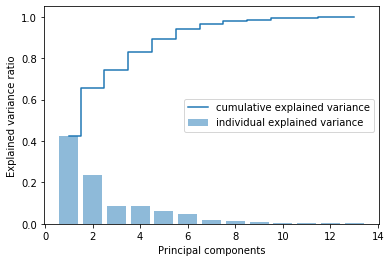

In [67]:
plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [68]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])  

X_std = np.dot(X,P_reduce.T)   # projecting original data into principal component dimensions

PCA_df = pd.DataFrame(X_std)  # converting array to dataframe for pairplot

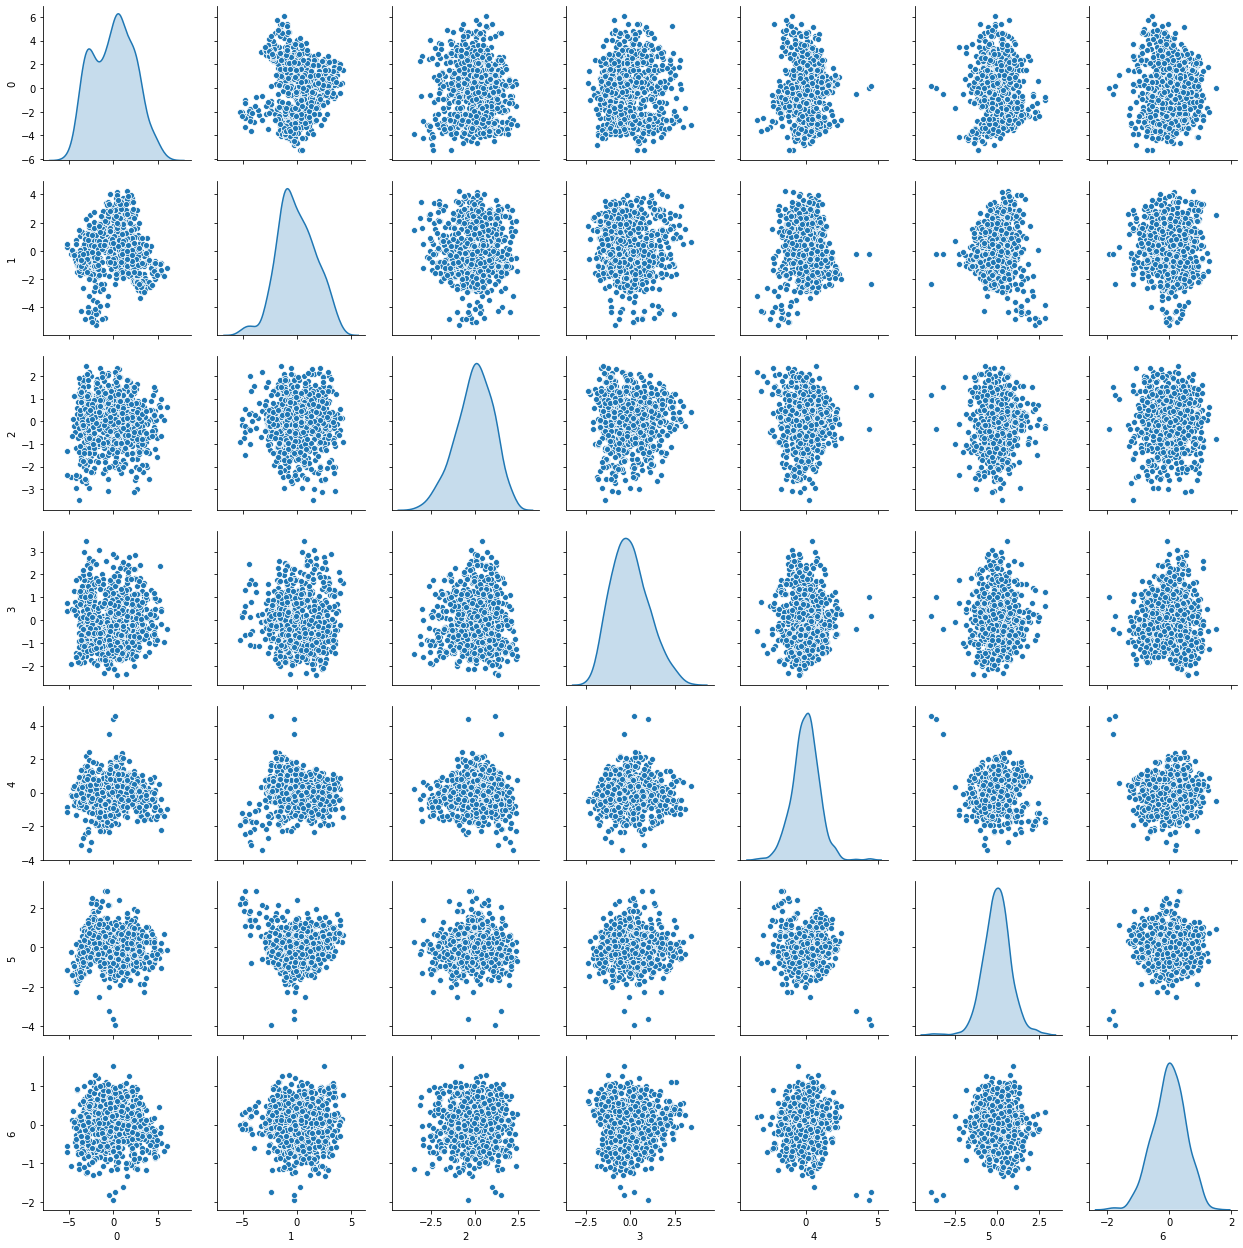

In [69]:
#Let us check it visually


sns.pairplot(PCA_df, diag_kind='kde') 

## 6. Train a Support vector machine using the Principal Components and get the accuracy on the test set


### Using the same random state as 10

In [70]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(PCA_df, y, test_size =.30, random_state=10)

print('Training and Testing Set Distribution:')

print(f'Training set has {X_pca_train.shape[0]} rows and {X_pca_train.shape[1]} columns')
print(f'Testing set has {X_pca_test.shape[0]} rows and {X_pca_test.shape[1]} columns')


Training and Testing Set Distribution:
Training set has 585 rows and 7 columns
Testing set has 252 rows and 7 columns


### Fit, Predict and Accuracy - PCA

In [71]:
svm.fit(X_pca_train, y_train)  
y_train_pred = svm.predict(X_pca_train)
y_test_pred = svm.predict(X_pca_test)

#get Precision Score on train and test
accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)
accdf_pca = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
accdf_pca

Accuracy
Training     0.932
Testing      0.873

### Observation
This is a good model as we have accuracy of **93.2%** for training set and **87.3%** for test set.

### K-Fold Cross Validation - 50 Splits - PCA

In [73]:
pca8 = PCA(n_components=7)
X_PCA8 = pca8.fit_transform(PCA_df)

In [74]:
results = cross_val_score(svm, X_PCA8, y, cv=kfold)
print(results)
kfold_result_pca = pd.DataFrame([[results.mean()*100.0, results.std()*100.0]], index=['KFold'], columns=['Mean Accuracy', 'Standard Deviation'])
kfold_result_pca

[0.88235294 0.82352941 0.94117647 1.         0.94117647 0.88235294
 0.94117647 1.         0.94117647 1.         0.94117647 1.
 0.88235294 0.88235294 1.         0.82352941 0.82352941 0.94117647
 1.         0.82352941 0.88235294 0.82352941 0.94117647 0.88235294
 0.94117647 0.94117647 0.82352941 0.94117647 0.94117647 1.
 0.88235294 0.88235294 0.94117647 1.         0.70588235 0.88235294
 0.94117647 0.9375     0.875      0.8125     0.875      1.
 0.9375     0.875      0.875      0.9375     0.8125     0.8125
 0.875      0.875     ]


Mean Accuracy  Standard Deviation
KFold      90.647059            6.579613

### Observation
KFold cross validation for PCA has resulted in a accuracy mean of **90.64%**  with a standard deviation of **6.57**.

### Confusion Matrix - PCA

In [75]:
confusion_matrix_test_pca = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test_pca

Predicted   0    1   2
Actual                
0          68    5   2
1           3  109   7
2           3   12  43

### Observation

Total number of Type-I and Type-II errors are 18

## Conclusion

Even after reducing dimensions from 13 to 8, we still have achieved very good results by doing PCA in terms for accuracy.

In [76]:
    
#function to display dataframes side by side    
from IPython.display import display_html
def display_side_by_side(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw=True)

In [77]:
print('SVM Standard')
display_side_by_side([accdf, kfold_result,confusion_matrix_test])

SVM Standard


Accuracy 
 
 
 
 
 Training 
 0.971 
 
 
 Testing 
 0.933 
 
 
 
 
 
 
 Mean Accuracy 
 Standard Deviation 
 
 
 
 
 KFold 
 96.154412 
 4.908996 
 
 
 
 
 
 Predicted 
 0 
 1 
 2 
 
 
 Actual 
 
 
 
 
 
 
 
 0 
 71 
 2 
 2 
 
 
 1 
 1 
 115 
 3 
 
 
 2 
 3 
 6 
 49

In [97]:
print('SVM with PCA')
display_side_by_side([accdf_pca, kfold_result_pca,confusion_matrix_test_pca])

SVM with PCA


Accuracy 
 
 
 
 
 Training 
 0.932 
 
 
 Testing 
 0.873 
 
 
 
 
 
 
 Mean Accuracy 
 Standard Deviation 
 
 
 
 
 KFold 
 90.647059 
 6.579613 
 
 
 
 
 
 Predicted 
 0 
 1 
 2 
 
 
 Actual 
 
 
 
 
 
 
 
 0 
 68 
 5 
 2 
 
 
 1 
 3 
 109 
 7 
 
 
 2 
 3 
 12 
 43

## END

# Optional Task

## 8 a. Apply Kmeans clustering on the principal components train data. Get the cluster labels and append to the same data as a column. Similarly, use the ‘predict’ function of Kmeans clustering to get the clusters on the PC test data and append the cluster labels.

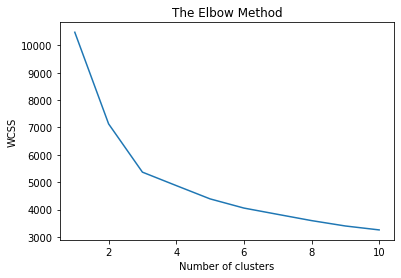

In [91]:

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(X_PCA8)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [94]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(X)
prediction=final_model.predict(X)

#Append the prediction 
df["GROUP"] = prediction
print("Groups Assigned : \n")
df[["class", "GROUP"]]

Groups Assigned : 



class  GROUP
0        2      1
1        2      0
2        1      1
3        2      0
5        0      1
..     ...    ...
841      1      0
842      2      0
843      1      1
844      1      0
845      2      0

[837 rows x 2 columns]

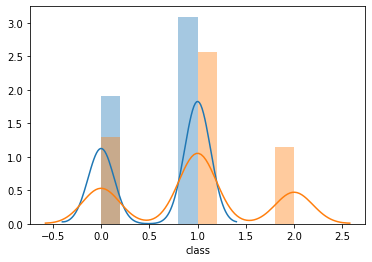

In [90]:
sns.distplot(df.GROUP);
sns.distplot(df["class"]);

In [95]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(X)
prediction=final_model.predict(X)

#Append the prediction 
df["GROUP"] = prediction
print("Groups Assigned : \n")
df[["class", "GROUP"]]

Groups Assigned : 



class  GROUP
0        2      1
1        2      1
2        1      0
3        2      1
5        0      0
..     ...    ...
841      1      1
842      2      1
843      1      0
844      1      1
845      2      2

[837 rows x 2 columns]

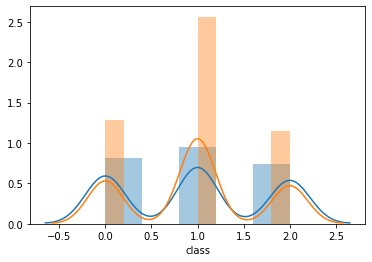

In [96]:
sns.distplot(df.GROUP);
sns.distplot(df["class"]);